# Importing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [3]:
file_path = './data/'


train = pd.read_csv(file_path + 'train.csv')
oil = pd.read_csv(file_path + 'oil.csv')
stores = pd.read_csv(file_path + 'stores.csv')
holidays = pd.read_csv(file_path + 'holidays_events.csv')
transactions = pd.read_csv(file_path + 'transactions.csv')

# Train dataset analysis

In [4]:
train.set_index('id', inplace=True)
train

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148


In [5]:
train.dtypes

date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

In [6]:
train['date'] = pd.to_datetime(train['date'])


In [7]:
families = train['family'].unique()

train_fam = {}

for family in families:
    df = train[train['family'] == family].copy()
    df.drop('family', axis=1, inplace=True)
    train_fam[family] = df

In [8]:
train_fam['AUTOMOTIVE']

,date,store_nbr,sales,onpromotion
id,,,,
0,2013-01-01,1,0.0,0
33,2013-01-01,10,0.0,0
66,2013-01-01,11,0.0,0
99,2013-01-01,12,0.0,0
132,2013-01-01,13,0.0,0
...,...,...,...,...
3000723,2017-08-15,54,8.0,0
3000756,2017-08-15,6,7.0,0
3000789,2017-08-15,7,5.0,0


['onpromotion', 'date', 'store_nbr', 'sales']
              date  store_nbr  sales  onpromotion
id                                               
0       2013-01-01          1    0.0            0
33      2013-01-01         10    0.0            0
66      2013-01-01         11    0.0            0
99      2013-01-01         12    0.0            0
132     2013-01-01         13    0.0            0
...            ...        ...    ...          ...
3000723 2017-08-15         54    8.0            0
3000756 2017-08-15          6    7.0            0
3000789 2017-08-15          7    5.0            0
3000822 2017-08-15          8    4.0            0
3000855 2017-08-15          9   15.0            0

[90936 rows x 4 columns]


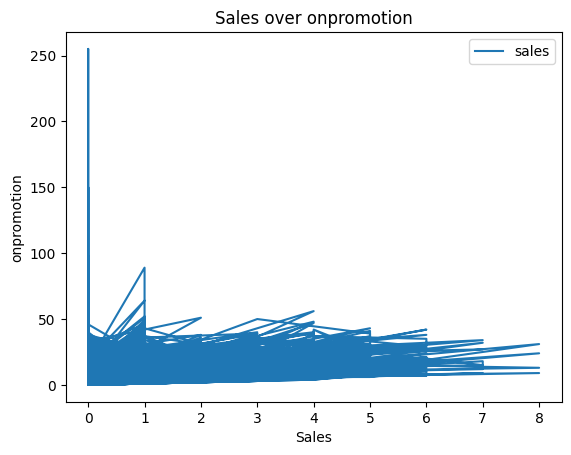

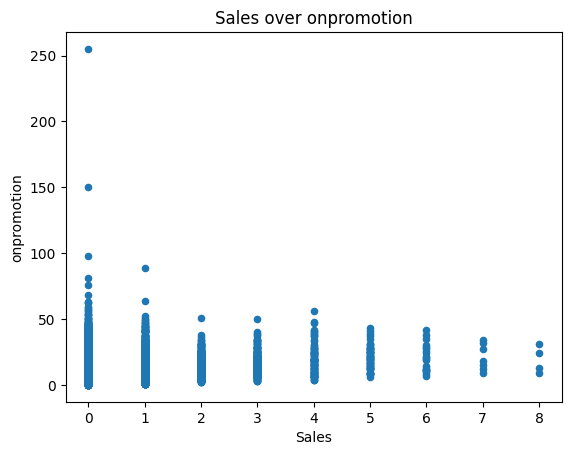

In [12]:
df = train_fam[families[0]]

# list gymnastics to get sales in the end
column = list(df.columns)
lis = column[:-1]
lis.insert(0, column[-1])
column = lis


plot_types = ['line', 'scatter', 'bar', 'barh', 'hist', 'pie', 'area', 'box', 'kde', 'hexbin']


for col in column:
    if (col == 'sales'):
        break
    
    for kind in plot_types:
        df.plot(x= str(col), y = 'sales', kind=kind)
    
        plt.xlabel('Sales')
        plt.ylabel(str(col))
        plt.title('Sales over ' + str(col))
    
        plt.show()